In [17]:
import torch
import torch.nn.functional as F
from task.TaskGenerator import SinTaskGenerator
import matplotlib.pyplot as plt

In [18]:
class PreOffsetVAENew(torch.nn.Module):
    def __init__(self):
        super(PreOffsetVAE, self).__init__()
        self.enc1 = torch.nn.Linear(3, 16) # 3 input: x, f_t(x), f_(t-1)(x)
        self.enc2 = torch.nn.GRU(input_size=16, hidden_size=16, num_layers=4, batch_first=True)
        self.enc31 = torch.nn.Linear(64, 3)
        #self.enc32 = torch.nn.Linear(64, 3)
        
    def encode(self, context):
        seq_len = context.shape[0]
        t = F.relu(self.enc1(context)).view(1, seq_len, 16)
        t = self.enc2(t)[0][0][-1, :] # we are interested only in the last output of the sequence
        t = F.relu(t)
        return self.enc31(t)
        
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std
    
    def forward(self, context):
        #mu, logvar = self.encode(context)
        #z = self.reparameterize(mu, logvar)
        #return z, mu, logvar
        return self.encode(context)
    
class PreOffsetVAEBatchVersion(torch.nn.Module):
    def __init__(self):
        super(PreOffsetVAEBatchVersion, self).__init__()
        self.enc1 = torch.nn.Linear(2, 16) # 3 input: x, f_t(x), f_(t-1)(x)
        self.enc2 = torch.nn.GRU(input_size=16, hidden_size=16, num_layers=2, batch_first=True)
        self.enc3 = torch.nn.Linear(16, 16)
        self.enc4 = torch.nn.Linear(16, 3)
        
    def encode(self, context):
        n_batch = context.shape[0]
        seq_len = context.shape[1]
        t = F.elu(self.enc1(context)).view(n_batch, seq_len, 16)
        t = self.enc2(t)[0][:, -1, :] # we are interested only in the last output of the sequence
        t = F.elu(t)
        t = F.elu(self.enc3(t))
        return  self.enc4(t)
        
        
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std
    
    def forward(self, context):
        return self.encode(context)

class PreOffsetVAE(torch.nn.Module):
    def __init__(self):
        super(PreOffsetVAE, self).__init__()
        self.enc1 = torch.nn.Linear(2, 16) # 3 input: x, f_t(x), f_(t-1)(x)
        self.enc2 = torch.nn.GRU(input_size=16, hidden_size=16, num_layers=4, batch_first=True)
        self.enc31 = torch.nn.Linear(64, 3)
        #self.enc32 = torch.nn.Linear(64, 3)
        
    def encode(self, context):
        seq_len = context.shape[0]
        t = F.relu(self.enc1(context)).view(1, seq_len, 16)
        t = self.enc2(t)[0][0][-1, :] # we are interested only in the last output of the sequence
        t = F.relu(t)
        #return self.enc31(t), self.enc32(t)
        return self.enc31(t)
        
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std
    
    def forward(self, context):
        #mu, logvar = self.encode(context)
        #z = self.reparameterize(mu, logvar)
        #return z, mu, logvar
        return self.encode(context)
    
class PreOffsetVAEBatchVersion(torch.nn.Module):
    def __init__(self):
        super(PreOffsetVAEBatchVersion, self).__init__()
        self.enc1 = torch.nn.Linear(2, 16) # 3 input: x, f_t(x), f_(t-1)(x)
        self.enc2 = torch.nn.GRU(input_size=16, hidden_size=16, num_layers=2, batch_first=True)
        self.enc3 = torch.nn.Linear(16, 16)
        self.enc4 = torch.nn.Linear(16, 3)
        
    def encode(self, context):
        n_batch = context.shape[0]
        seq_len = context.shape[1]
        t = F.elu(self.enc1(context)).view(n_batch, seq_len, 16)
        t = self.enc2(t)[0][:, -1, :] # we are interested only in the last output of the sequence
        t = F.elu(t)
        t = F.elu(self.enc3(t))
        return  self.enc4(t)
        
        
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std
    
    def forward(self, context):
        return self.encode(context)

In [22]:
class PreOffsetVAEBatchVersionNEWNEW(torch.nn.Module):
    def __init__(self):
        super(PreOffsetVAEBatchVersionNEWNEW, self).__init__()
        self.enc1 = torch.nn.Linear(3, 16) # 3 input: x, f_t(x), f_(t-1)(x)
        self.enc2 = torch.nn.GRU(input_size=16, hidden_size=16, num_layers=2, batch_first=True)
        self.enc3 = torch.nn.Linear(16, 16)
        self.enc4 = torch.nn.Linear(16, 3)
        
    def encode(self, context):
        n_batch = context.shape[0]
        seq_len = context.shape[1]
        t = F.elu(self.enc1(context)).view(n_batch, seq_len, 16)
        t = self.enc2(t)[0][:, -1, :] # we are interested only in the last output of the sequence
        t = F.elu(t)
        t = F.elu(self.enc3(t))
        return  self.enc4(t)
        
        
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std
    
    def forward(self, context):
        return self.encode(context)

In [23]:
model = PreOffsetVAEBatchVersionNEWNEW()
optimizer = torch.optim.Adam(model.parameters())

In [20]:
def loss_function(recon_f, f):
    MSE = F.mse_loss(recon_f, f)
    #KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    
    return MSE 

In [21]:
task_gen = SinTaskGenerator(x_min=-5, x_max=5)
dataset = []

# Task parameters range
max_a = 0.5
min_a = 10

min_phase = -1
max_phase = 1

min_freq = 1
max_freq = 5

def sample_task(n_batches=10, test_perc=0, batch_size=128):
    a = (min_a - max_a) * torch.rand(1) + max_a
    phase = (min_phase - max_phase) * torch.rand(1) + max_phase
    f = (min_freq - max_freq) * torch.rand(1) + max_freq
    
    """
    a_t2 = a_t1 + torch.rand(1) * offset_a_max
    phase_t2 = phase_t1 + torch.rand(1) * offset_phase_max
    f_t2 = f_t1 + torch.rand(1) * offset_f_max
    """
    data = task_gen.get_data_loader(amplitude=a, 
                                    phase=phase,
                                    frequency=f,
                                    num_batches=n_batches,
                                    test_perc=test_perc, 
                                    batch_size=batch_size)

    return data, a, phase, f

# Dataset creation
n_tasks = 1000
data_set = []
a_set = []
phase_set = []
f_set = []
for _ in range(n_tasks):
    data, a, phase, f = sample_task(n_batches=1, test_perc=0, batch_size=128)
    data_set.append(data)
    a_set.append(a)
    phase_set.append(phase)
    f_set.append(f)

In [14]:
offset = 2


def batch_train_offset(epoch, n_batch=10):
    train_loss = 0
    n_batch = 32
    batch_per_task = 1
    task_idx = torch.randint(low=0, high=n_tasks, size=(n_batch,))
    task_loader = [data_set[i] for i in task_idx]

    for k in range(batch_per_task):
        num_data_context = torch.randint(low=10, high=30, size=(1,)).item()
        num_data_eval = 128 - num_data_context
        idx = torch.randint(0, 128, (128,))

        context = torch.empty(n_batch*batch_per_task, num_data_context, 2)
        x = torch.empty(n_batch*batch_per_task, num_data_eval, 2)
        y = torch.empty(n_batch*batch_per_task, num_data_eval, 1)

        # Retrieving data to be fed to the network 
        i = 0
        for task in task_loader:
            batch = task[k]['train']
            ctx_idx = idx[0:num_data_context]
            x_idx = idx[num_data_context:]

            y[i] = batch[1][x_idx]

            batch = torch.cat([batch[0], batch[1]], dim=1)

            x[i] = batch[x_idx]
            context[i] = batch[ctx_idx]

            i+=1

        optimizer.zero_grad()
        z = model(context)

        # Compute reconstruction
        y_hat = z[:, 0].unsqueeze(1) * torch.sin((z[:, 1].unsqueeze(1) * x[:, :, 0]) + z[:, 2].unsqueeze(1))
        y = y.squeeze()

        loss = loss_function(y_hat, y)
        loss.backward()

        train_loss += loss.item()
        optimizer.step()
    
    return train_loss / (batch_per_task)

def batch_train(epoch, n_batch=10):
    train_loss = 0
    n_batch = 32
    batch_per_task = 1
    task_idx = torch.randint(low=0, high=n_tasks, size=(n_batch,))
    task_loader = [data_set[i] for i in task_idx]

    for k in range(batch_per_task):
        num_data_context = torch.randint(low=10, high=30, size=(1,)).item()
        num_data_eval = 128 - num_data_context
        idx = torch.randint(0, 128, (128,))

        context = torch.empty(n_batch*batch_per_task, num_data_context, 2)
        x = torch.empty(n_batch*batch_per_task, num_data_eval, 2)
        y = torch.empty(n_batch*batch_per_task, num_data_eval, 1)

        # Retrieving data to be fed to the network 
        i = 0
        for task in task_loader:
            batch = task[k]['train']
            ctx_idx = idx[0:num_data_context]
            x_idx = idx[num_data_context:]

            y[i] = batch[1][x_idx]

            batch = torch.cat([batch[0], batch[1]], dim=1)

            x[i] = batch[x_idx]
            context[i] = batch[ctx_idx]

            i+=1

        optimizer.zero_grad()
        z = model(context)

        # Compute reconstruction
        y_hat = z[:, 0].unsqueeze(1) * torch.sin((z[:, 1].unsqueeze(1) * x[:, :, 0]) + z[:, 2].unsqueeze(1))
        y = y.squeeze()

        loss = loss_function(y_hat, y)
        loss.backward()

        train_loss += loss.item()
        optimizer.step()
    
    return train_loss / (batch_per_task)
    

def train(epoch):
    model.train()
    train_loss = 0
    task_idx = torch.randint(low=0, high=n_tasks, size=(1,)).item()
    data_loader = data_set[task_idx]
    
    # Current task latent space
    a = a_set[task_idx]
    p = phase_set[task_idx]
    f = f_set[task_idx]
    
    # Previous task latent space
    #a_prev = a + torch.rand(1) * offset
    #p_prev = p + torch.rand(1) * offset
    #f_prev = f + torch.rand(1) * offset
    
    for batch_idx, batch in enumerate(data_loader):
        # Retrieving information from the dataset
        num_data_context = torch.randint(low=10, high=30, size=(1,)).item()
        batch = batch['train']
        idx = torch.randint(0, 128, (128,))
        ctx_idx = idx[0:num_data_context]
        x_idx = idx[num_data_context:]
        
        y = batch[1][x_idx]
        batch = torch.cat([batch[0], batch[1]], dim=1)
        x = batch[x_idx]
        context = batch[ctx_idx]
        
        
        # Compute latent model
        optimizer.zero_grad()
        z = model(context)
        
        # Compute reconstruction
        y_hat = (z[0]) * torch.sin((z[1])*x[:, 0:1] + (z[2]))
        loss = loss_function(y_hat, y)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    return train_loss / (batch_idx+1)


In [15]:
n_epochs = 300000
losses = []
l_sum = 0
for i in range(n_epochs):
    l = batch_train(i)
    l_sum += l
    losses.append(l)
    if i % 100 == 0:
        print('====> Epoch: {} Average loss: {:.4f}'.format(i, l_sum/(i+1)))

====> Epoch: 0 Average loss: 16.3918
====> Epoch: 100 Average loss: 17.0588
====> Epoch: 200 Average loss: 17.1839
====> Epoch: 300 Average loss: 17.1704
====> Epoch: 400 Average loss: 17.1752
====> Epoch: 500 Average loss: 17.0686
====> Epoch: 600 Average loss: 17.0508
====> Epoch: 700 Average loss: 17.0496
====> Epoch: 800 Average loss: 16.9937
====> Epoch: 900 Average loss: 16.9837
====> Epoch: 1000 Average loss: 16.9572
====> Epoch: 1100 Average loss: 16.9292
====> Epoch: 1200 Average loss: 16.9445
====> Epoch: 1300 Average loss: 16.9444
====> Epoch: 1400 Average loss: 16.9781
====> Epoch: 1500 Average loss: 16.9665
====> Epoch: 1600 Average loss: 16.9810
====> Epoch: 1700 Average loss: 16.9670
====> Epoch: 1800 Average loss: 16.9788
====> Epoch: 1900 Average loss: 16.9707
====> Epoch: 2000 Average loss: 16.9918
====> Epoch: 2100 Average loss: 16.9825
====> Epoch: 2200 Average loss: 16.9742
====> Epoch: 2300 Average loss: 16.9670
====> Epoch: 2400 Average loss: 16.9547
====> Epoch:

====> Epoch: 20300 Average loss: 16.9142
====> Epoch: 20400 Average loss: 16.9147
====> Epoch: 20500 Average loss: 16.9137
====> Epoch: 20600 Average loss: 16.9122
====> Epoch: 20700 Average loss: 16.9097
====> Epoch: 20800 Average loss: 16.9069
====> Epoch: 20900 Average loss: 16.9069
====> Epoch: 21000 Average loss: 16.9053
====> Epoch: 21100 Average loss: 16.9046
====> Epoch: 21200 Average loss: 16.9054
====> Epoch: 21300 Average loss: 16.9072
====> Epoch: 21400 Average loss: 16.9050
====> Epoch: 21500 Average loss: 16.9034
====> Epoch: 21600 Average loss: 16.9042
====> Epoch: 21700 Average loss: 16.9040
====> Epoch: 21800 Average loss: 16.9019
====> Epoch: 21900 Average loss: 16.9028
====> Epoch: 22000 Average loss: 16.9033
====> Epoch: 22100 Average loss: 16.9023
====> Epoch: 22200 Average loss: 16.9005
====> Epoch: 22300 Average loss: 16.8996
====> Epoch: 22400 Average loss: 16.8982
====> Epoch: 22500 Average loss: 16.8986
====> Epoch: 22600 Average loss: 16.8973
====> Epoch: 227

====> Epoch: 40300 Average loss: 16.8847
====> Epoch: 40400 Average loss: 16.8850
====> Epoch: 40500 Average loss: 16.8849
====> Epoch: 40600 Average loss: 16.8842
====> Epoch: 40700 Average loss: 16.8841
====> Epoch: 40800 Average loss: 16.8844
====> Epoch: 40900 Average loss: 16.8843
====> Epoch: 41000 Average loss: 16.8848
====> Epoch: 41100 Average loss: 16.8843
====> Epoch: 41200 Average loss: 16.8842
====> Epoch: 41300 Average loss: 16.8840
====> Epoch: 41400 Average loss: 16.8850
====> Epoch: 41500 Average loss: 16.8847
====> Epoch: 41600 Average loss: 16.8848
====> Epoch: 41700 Average loss: 16.8848
====> Epoch: 41800 Average loss: 16.8852
====> Epoch: 41900 Average loss: 16.8850
====> Epoch: 42000 Average loss: 16.8846
====> Epoch: 42100 Average loss: 16.8847
====> Epoch: 42200 Average loss: 16.8851
====> Epoch: 42300 Average loss: 16.8864
====> Epoch: 42400 Average loss: 16.8866
====> Epoch: 42500 Average loss: 16.8871
====> Epoch: 42600 Average loss: 16.8861
====> Epoch: 427

====> Epoch: 60300 Average loss: 16.8808
====> Epoch: 60400 Average loss: 16.8818
====> Epoch: 60500 Average loss: 16.8819
====> Epoch: 60600 Average loss: 16.8816
====> Epoch: 60700 Average loss: 16.8820
====> Epoch: 60800 Average loss: 16.8817
====> Epoch: 60900 Average loss: 16.8816
====> Epoch: 61000 Average loss: 16.8809
====> Epoch: 61100 Average loss: 16.8808
====> Epoch: 61200 Average loss: 16.8800
====> Epoch: 61300 Average loss: 16.8803
====> Epoch: 61400 Average loss: 16.8803
====> Epoch: 61500 Average loss: 16.8801
====> Epoch: 61600 Average loss: 16.8795
====> Epoch: 61700 Average loss: 16.8791
====> Epoch: 61800 Average loss: 16.8781
====> Epoch: 61900 Average loss: 16.8782
====> Epoch: 62000 Average loss: 16.8775
====> Epoch: 62100 Average loss: 16.8779
====> Epoch: 62200 Average loss: 16.8786
====> Epoch: 62300 Average loss: 16.8791
====> Epoch: 62400 Average loss: 16.8794
====> Epoch: 62500 Average loss: 16.8800
====> Epoch: 62600 Average loss: 16.8802
====> Epoch: 627

====> Epoch: 80300 Average loss: 16.8737
====> Epoch: 80400 Average loss: 16.8740
====> Epoch: 80500 Average loss: 16.8739
====> Epoch: 80600 Average loss: 16.8739
====> Epoch: 80700 Average loss: 16.8741
====> Epoch: 80800 Average loss: 16.8739
====> Epoch: 80900 Average loss: 16.8741
====> Epoch: 81000 Average loss: 16.8740
====> Epoch: 81100 Average loss: 16.8737
====> Epoch: 81200 Average loss: 16.8736
====> Epoch: 81300 Average loss: 16.8735
====> Epoch: 81400 Average loss: 16.8733
====> Epoch: 81500 Average loss: 16.8729
====> Epoch: 81600 Average loss: 16.8725
====> Epoch: 81700 Average loss: 16.8723
====> Epoch: 81800 Average loss: 16.8722
====> Epoch: 81900 Average loss: 16.8726
====> Epoch: 82000 Average loss: 16.8723
====> Epoch: 82100 Average loss: 16.8719
====> Epoch: 82200 Average loss: 16.8725
====> Epoch: 82300 Average loss: 16.8723
====> Epoch: 82400 Average loss: 16.8720
====> Epoch: 82500 Average loss: 16.8723
====> Epoch: 82600 Average loss: 16.8727
====> Epoch: 827

====> Epoch: 100300 Average loss: 16.8653
====> Epoch: 100400 Average loss: 16.8653
====> Epoch: 100500 Average loss: 16.8650
====> Epoch: 100600 Average loss: 16.8652
====> Epoch: 100700 Average loss: 16.8647
====> Epoch: 100800 Average loss: 16.8650
====> Epoch: 100900 Average loss: 16.8648
====> Epoch: 101000 Average loss: 16.8646
====> Epoch: 101100 Average loss: 16.8642
====> Epoch: 101200 Average loss: 16.8643
====> Epoch: 101300 Average loss: 16.8643
====> Epoch: 101400 Average loss: 16.8642
====> Epoch: 101500 Average loss: 16.8642
====> Epoch: 101600 Average loss: 16.8636
====> Epoch: 101700 Average loss: 16.8635
====> Epoch: 101800 Average loss: 16.8631
====> Epoch: 101900 Average loss: 16.8628
====> Epoch: 102000 Average loss: 16.8627
====> Epoch: 102100 Average loss: 16.8631
====> Epoch: 102200 Average loss: 16.8631
====> Epoch: 102300 Average loss: 16.8631
====> Epoch: 102400 Average loss: 16.8635
====> Epoch: 102500 Average loss: 16.8637
====> Epoch: 102600 Average loss: 

====> Epoch: 119900 Average loss: 16.8604
====> Epoch: 120000 Average loss: 16.8602
====> Epoch: 120100 Average loss: 16.8603
====> Epoch: 120200 Average loss: 16.8605
====> Epoch: 120300 Average loss: 16.8601
====> Epoch: 120400 Average loss: 16.8602
====> Epoch: 120500 Average loss: 16.8602
====> Epoch: 120600 Average loss: 16.8601
====> Epoch: 120700 Average loss: 16.8599
====> Epoch: 120800 Average loss: 16.8602
====> Epoch: 120900 Average loss: 16.8603
====> Epoch: 121000 Average loss: 16.8604
====> Epoch: 121100 Average loss: 16.8606
====> Epoch: 121200 Average loss: 16.8608
====> Epoch: 121300 Average loss: 16.8608
====> Epoch: 121400 Average loss: 16.8608
====> Epoch: 121500 Average loss: 16.8607
====> Epoch: 121600 Average loss: 16.8605
====> Epoch: 121700 Average loss: 16.8605
====> Epoch: 121800 Average loss: 16.8603
====> Epoch: 121900 Average loss: 16.8604
====> Epoch: 122000 Average loss: 16.8606
====> Epoch: 122100 Average loss: 16.8603
====> Epoch: 122200 Average loss: 

====> Epoch: 139500 Average loss: 16.8538
====> Epoch: 139600 Average loss: 16.8537
====> Epoch: 139700 Average loss: 16.8539
====> Epoch: 139800 Average loss: 16.8538
====> Epoch: 139900 Average loss: 16.8538
====> Epoch: 140000 Average loss: 16.8540
====> Epoch: 140100 Average loss: 16.8539
====> Epoch: 140200 Average loss: 16.8537
====> Epoch: 140300 Average loss: 16.8538
====> Epoch: 140400 Average loss: 16.8538
====> Epoch: 140500 Average loss: 16.8537
====> Epoch: 140600 Average loss: 16.8537
====> Epoch: 140700 Average loss: 16.8535
====> Epoch: 140800 Average loss: 16.8536
====> Epoch: 140900 Average loss: 16.8530
====> Epoch: 141000 Average loss: 16.8530
====> Epoch: 141100 Average loss: 16.8528
====> Epoch: 141200 Average loss: 16.8525
====> Epoch: 141300 Average loss: 16.8525
====> Epoch: 141400 Average loss: 16.8525
====> Epoch: 141500 Average loss: 16.8528
====> Epoch: 141600 Average loss: 16.8529
====> Epoch: 141700 Average loss: 16.8528
====> Epoch: 141800 Average loss: 

====> Epoch: 159100 Average loss: 16.8492
====> Epoch: 159200 Average loss: 16.8492
====> Epoch: 159300 Average loss: 16.8491
====> Epoch: 159400 Average loss: 16.8491
====> Epoch: 159500 Average loss: 16.8491
====> Epoch: 159600 Average loss: 16.8491
====> Epoch: 159700 Average loss: 16.8491
====> Epoch: 159800 Average loss: 16.8489
====> Epoch: 159900 Average loss: 16.8489
====> Epoch: 160000 Average loss: 16.8485
====> Epoch: 160100 Average loss: 16.8485
====> Epoch: 160200 Average loss: 16.8484
====> Epoch: 160300 Average loss: 16.8485
====> Epoch: 160400 Average loss: 16.8484
====> Epoch: 160500 Average loss: 16.8482
====> Epoch: 160600 Average loss: 16.8480
====> Epoch: 160700 Average loss: 16.8479
====> Epoch: 160800 Average loss: 16.8480
====> Epoch: 160900 Average loss: 16.8479
====> Epoch: 161000 Average loss: 16.8478
====> Epoch: 161100 Average loss: 16.8480
====> Epoch: 161200 Average loss: 16.8478
====> Epoch: 161300 Average loss: 16.8479
====> Epoch: 161400 Average loss: 

====> Epoch: 178700 Average loss: 16.8430
====> Epoch: 178800 Average loss: 16.8428
====> Epoch: 178900 Average loss: 16.8429
====> Epoch: 179000 Average loss: 16.8429
====> Epoch: 179100 Average loss: 16.8426
====> Epoch: 179200 Average loss: 16.8424
====> Epoch: 179300 Average loss: 16.8424
====> Epoch: 179400 Average loss: 16.8424
====> Epoch: 179500 Average loss: 16.8425
====> Epoch: 179600 Average loss: 16.8425
====> Epoch: 179700 Average loss: 16.8421
====> Epoch: 179800 Average loss: 16.8418
====> Epoch: 179900 Average loss: 16.8420
====> Epoch: 180000 Average loss: 16.8419
====> Epoch: 180100 Average loss: 16.8423
====> Epoch: 180200 Average loss: 16.8423
====> Epoch: 180300 Average loss: 16.8423
====> Epoch: 180400 Average loss: 16.8423
====> Epoch: 180500 Average loss: 16.8421
====> Epoch: 180600 Average loss: 16.8421
====> Epoch: 180700 Average loss: 16.8423
====> Epoch: 180800 Average loss: 16.8420
====> Epoch: 180900 Average loss: 16.8421
====> Epoch: 181000 Average loss: 

KeyboardInterrupt: 

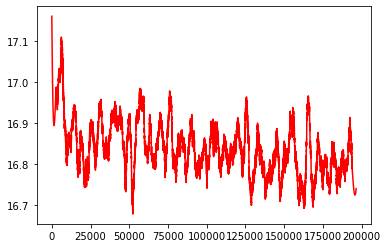

In [16]:
import numpy as np
from scipy.signal import savgol_filter
y = np.array(losses)
x = np.arange(len(y))
yhat = savgol_filter(y,5001, 3) 

plt.plot(x, yhat, color='red')
plt.show()

In [26]:
l1 = torch.nn.Linear(2, 32) # 3 input: x, f_t(x), f_(t-1)(x)
l2 = torch.nn.GRU(input_size=32, hidden_size=32, num_layers=3, batch_first=True)

In [97]:
t = torch.randn(2, 10, 2)
t = l1(t)
t.shape

torch.Size([2, 10, 32])

In [99]:
t = t.view(2, 10, 32)

In [100]:
out, h = l2(t)

In [153]:
out[:, -1, :].shape

torch.Size([2, 32])

In [150]:
out[0][-1, :]

tensor([-0.0267,  0.0988, -0.0140, -0.1717,  0.0810,  0.2747, -0.2758, -0.2198,
         0.0637,  0.1286, -0.0717,  0.3180,  0.3129, -0.0875,  0.1177,  0.1771,
         0.0639,  0.0596, -0.1023, -0.1265, -0.0103, -0.1816,  0.2840, -0.0428,
         0.1624, -0.0664,  0.0561, -0.0869, -0.1289,  0.3139,  0.2496,  0.2450],
       grad_fn=<SliceBackward>)